# 비지도 학습과 데이터 전처리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 3.3 데이터 전처리와 스케일 조정

## 공통

In [1]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
from preamble import *

## 데이터 전처리와 스케일링

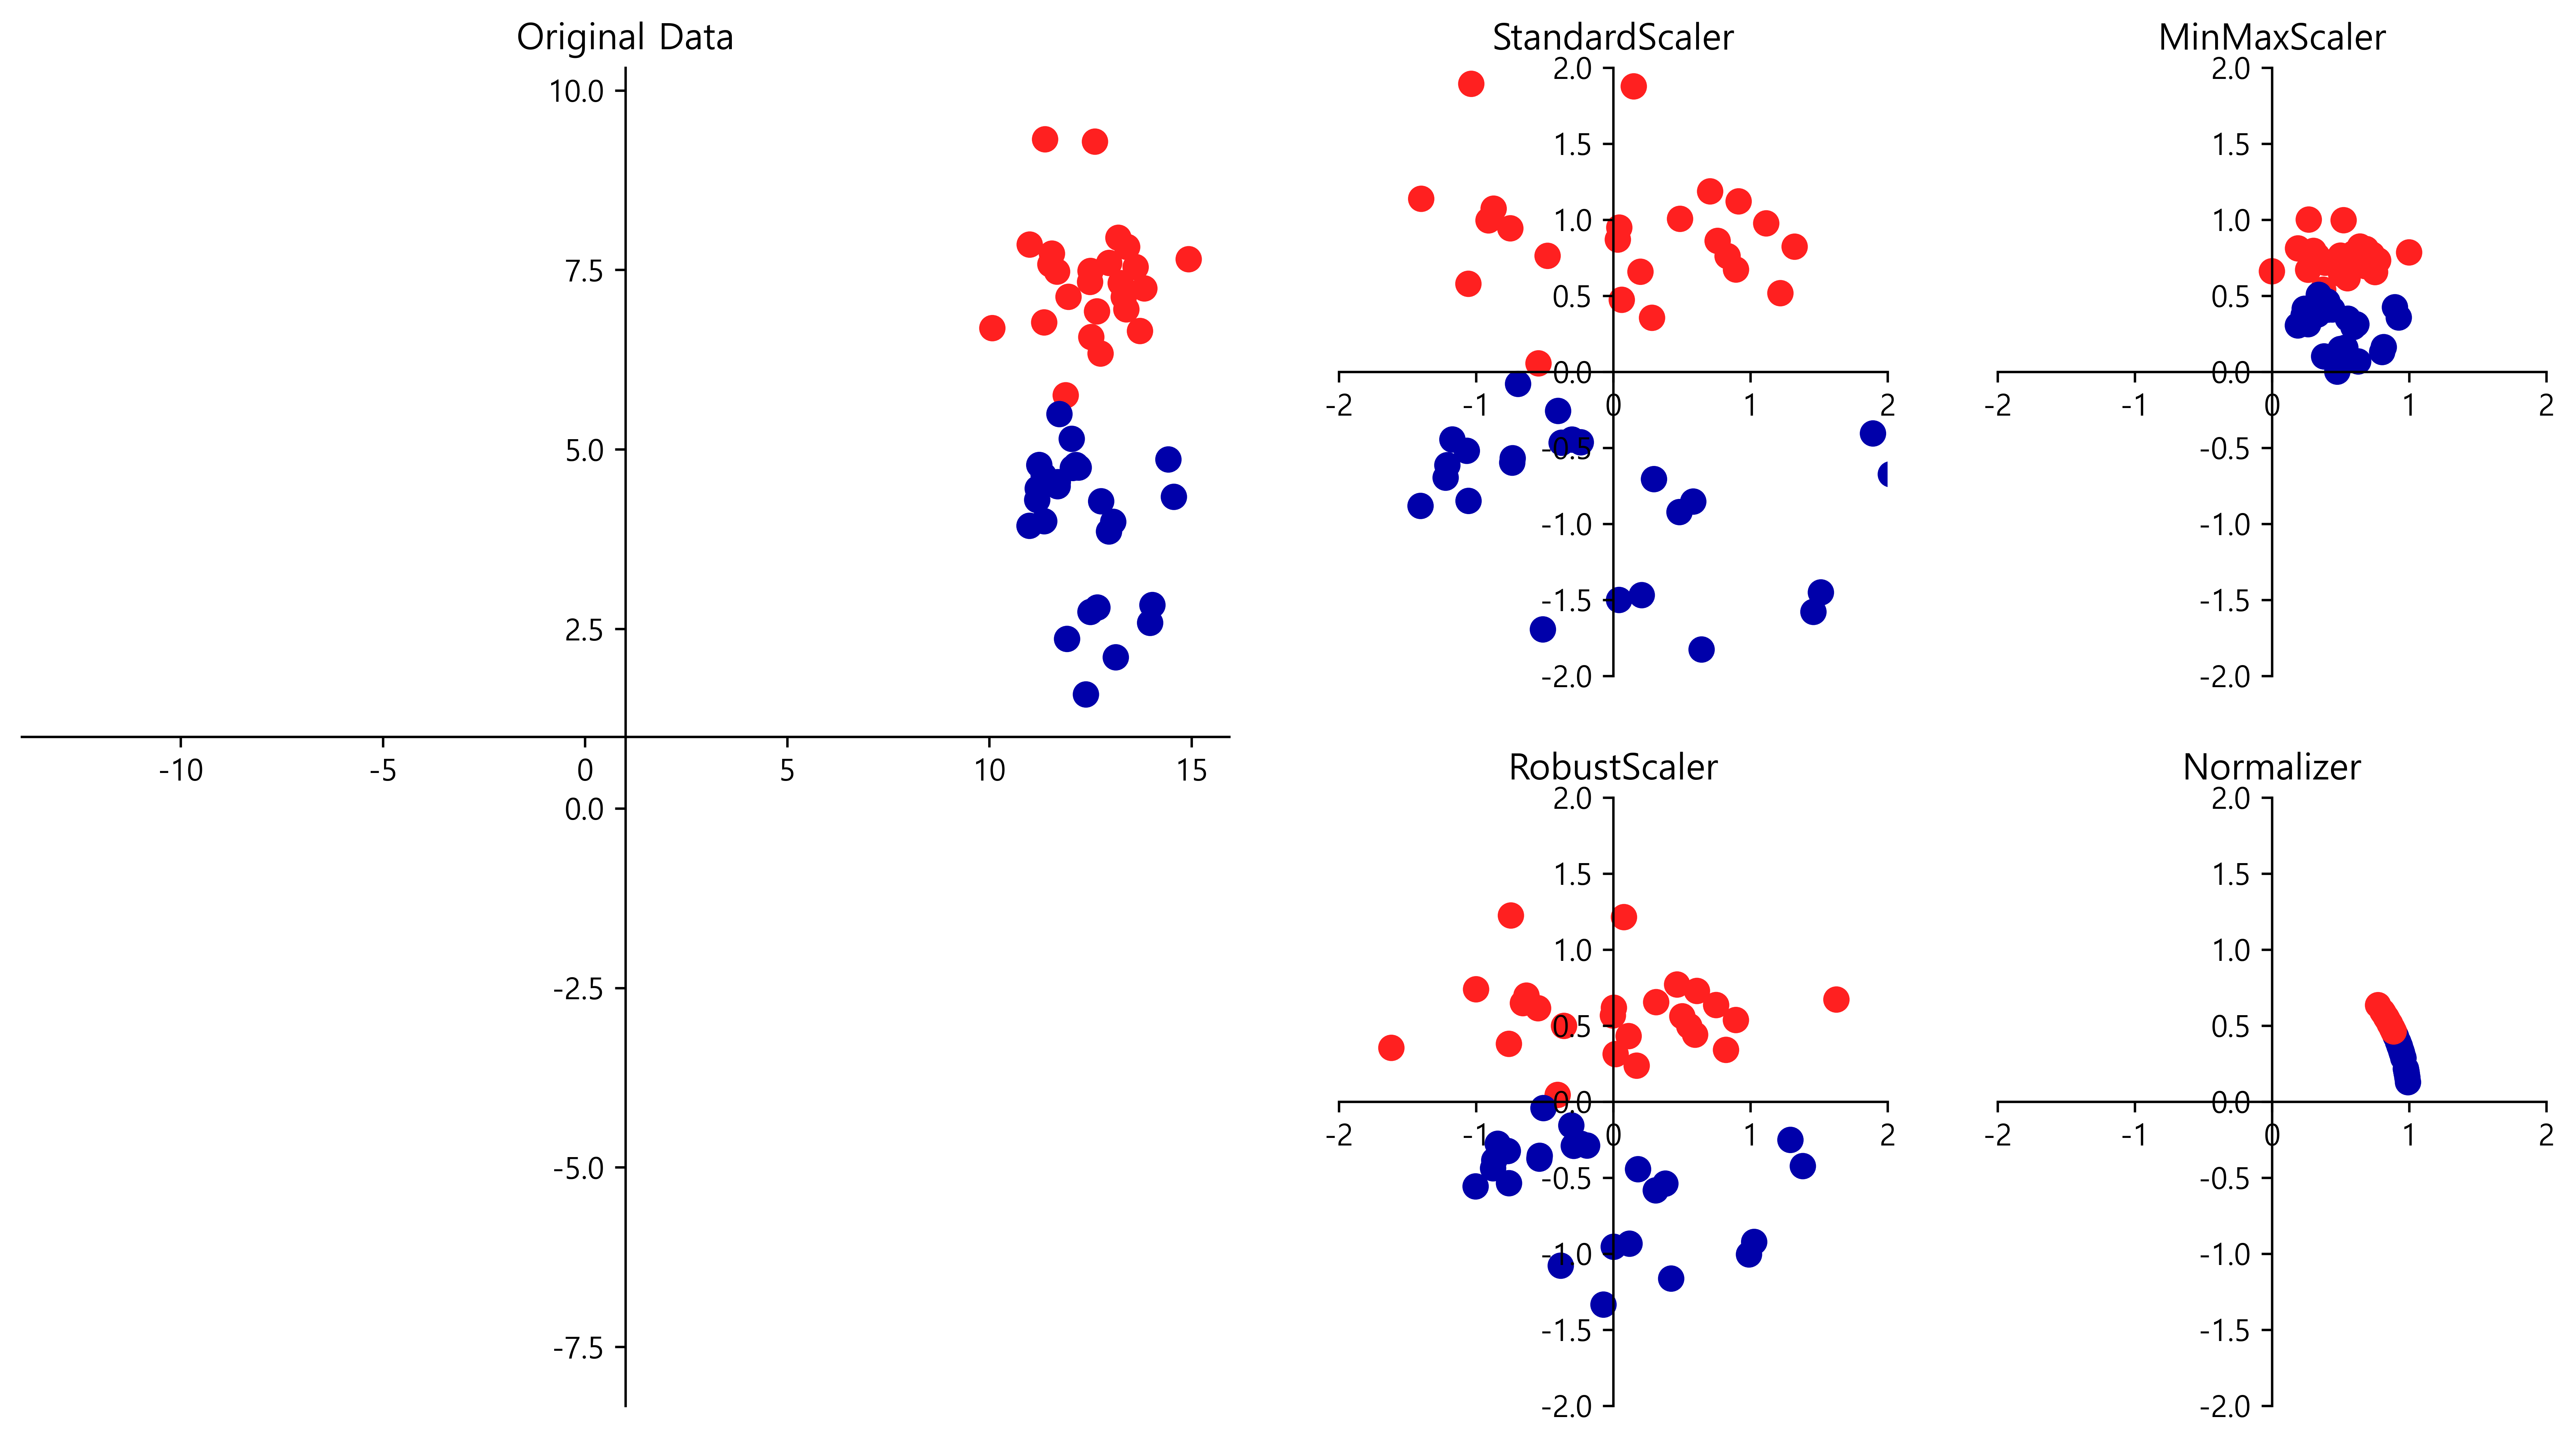

In [3]:
mglearn.plots.plot_scaling()

### 데이터 준비

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


### TRANS-Q1. MinMaxScaler
- TRANS-Q1(a). 학습 데이터를 MinMaxScaler로 변환하고 최소값과 최대값을 출력하세요.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
x_train_scaeld = scaler.transform(X_train)


- TRANS-Q1(b). 테스트 데이터를 MinMaxScaler로 변환하고 최소값과 최대값을 출력하세요.

In [6]:
X_test_scaeld = scaler.transform(X_test)
print(X_test_scaeld.min(axis=0), X_test_scaeld.min(axis=0))

[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002] [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]


### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

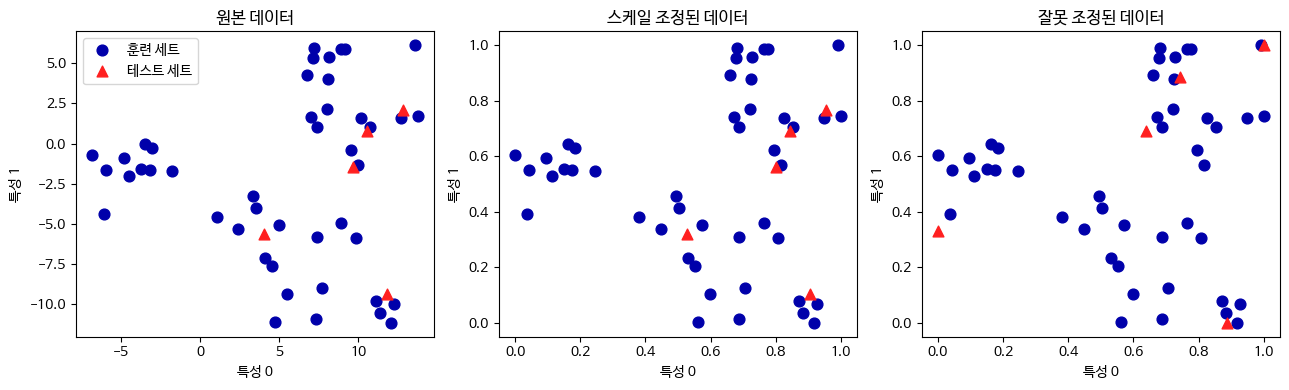

In [9]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

### TRANS-Q2. StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaeld = scaler.fit(X_train).transform(X_train)
x_train_scaeld

array([[ 0.306,  2.595,  0.462, ...,  1.815,  2.102,  3.386],
       [ 0.234, -0.053,  0.206, ...,  0.514,  0.147,  0.052],
       [ 0.156,  0.183,  0.113, ...,  0.694,  0.263, -0.1  ],
       ...,
       [ 0.856,  1.193,  0.898, ...,  1.13 ,  0.756,  2.971],
       [-0.025,  0.441, -0.086, ..., -0.525, -1.129, -0.456],
       [-0.303, -0.21 , -0.375, ..., -0.968, -1.544, -1.315]])

### TRANS-Q3. 지도 학습에서 데이터 전처리 효과

In [8]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.6153846153846154

- TRANS-Q3(a). 학습 데이터를 Min/Max 스케일로 조정하고 정확도를 출력하세요.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaeld = scaler.fit(X_train).transform(X_train)
x_test_scaeld = scaler.fit(X_train).transform(X_test)

svm.fit(x_train_scaeld, y_train)
svm.score(x_test_scaeld, y_test)

0.9440559440559441

- TRANS-Q3(b). 학습 데이터를 StandardScaler로 변환하고 정확도를 출력하세요.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaeld = scaler.fit(X_train).transform(X_train)
x_test_scaeld = scaler.fit(X_train).transform(X_test)

svm.fit(x_train_scaeld, y_train)
svm.score(x_test_scaeld, y_test)

0.965034965034965

전처리 과정에서 outlier는(이상치, 툭 튀는값) 상황에 따라 빼도 된다 outlier가 있으면 편향이 생김

Standard, MinMax, normalizer 사용 할 때 outlier를 유심히 봐야한다

outlier를 뺄 수 없을 때 RobustScaler를 사용

//////////////////////////////////////////////////////////////////////////////////////////

비지도 학습 : 타겟(X) 우리도 답을 모름 => 유사한 데이터는 유사한 행동을 한다.

독립변인 = 특성(feature),열(columm)